# Exponentially weighted moving covariance

In [1]:
import os, sys
sys.path.append(os.path.abspath('..'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import xpca

In [4]:
first_year = 2008; last_year = 2020

In [5]:
df = pd.read_parquet('../data/equity_indices.parquet')

In [6]:
df = df[str(first_year):str(last_year)]

In [7]:
df.head()

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
Datetime,,,,,,,,,
2008-01-01 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001823
2008-01-01 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000383
2008-01-01 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000671
2008-01-01 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000862
2008-01-01 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.001821


In [8]:
df.tail()

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
Datetime,,,,,,,,,
2020-12-31 12:00:00,0.0,0.001415,0.001830,0.0,0.0,0.001778,0.000304,0.0,0.001128
2020-12-31 13:00:00,0.0,-0.000336,-0.000652,0.0,0.0,-0.000702,-0.000609,0.0,-0.000398
2020-12-31 14:00:00,0.0,0.002895,0.002132,0.0,0.0,0.002030,0.001827,0.0,0.003115
2020-12-31 15:00:00,0.0,0.002819,-0.002171,0.0,0.0,0.002182,-0.001216,0.0,0.002941
2020-12-31 16:00:00,0.0,0.001138,0.002785,0.0,0.0,0.001030,0.002080,0.0,0.000461


In [9]:
ewmcov = xpca.EWMCov(alpha=.9305)

In [10]:
xs = df.values

In [11]:
n = np.shape(xs)[0]

In [12]:
means = []
covs = []
for i in range(n):
    ewmcov.add(xs[i,:])
    means.append(ewmcov.mean)
    covs.append(ewmcov.cov)

<ipython-input-13-4cde05187d65>:10: RuntimeWarning: invalid value encountered in double_scalars
  ax.plot(df.index, [c[idx_1,idx_2] / np.sqrt(c[idx_1,idx_1] * c[idx_2,idx_2]) for c in covs], linewidth=.5)


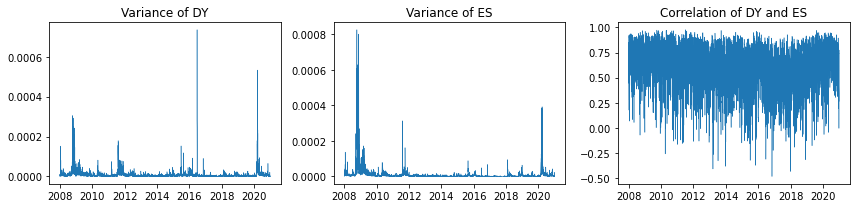

In [13]:
idx_1 = 0; idx_2 = 1
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(131)
ax.plot(df.index, [c[idx_1,idx_1] for c in covs], linewidth=.5)
ax.set_title(f'Variance of {df.columns[idx_1]}')
ax = fig.add_subplot(132)
ax.plot(df.index, [c[idx_2,idx_2] for c in covs], linewidth=.5)
ax.set_title(f'Variance of {df.columns[idx_2]}')
ax = fig.add_subplot(133)
ax.plot(df.index, [c[idx_1,idx_2] / np.sqrt(c[idx_1,idx_1] * c[idx_2,idx_2]) for c in covs], linewidth=.5)
ax.set_title(f'Correlation of {df.columns[idx_1]} and {df.columns[idx_2]}')
fig.tight_layout();

In [14]:
sample_cov = np.cov(xs, rowvar=False)

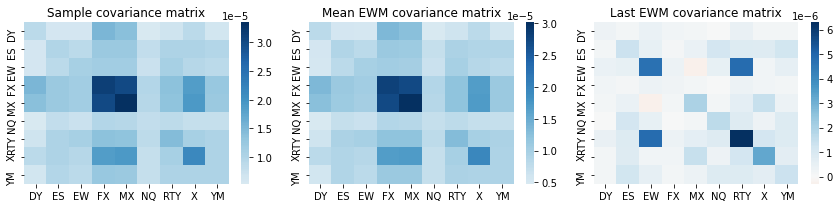

In [15]:
fig = plt.figure(figsize=(12, 3))
ax = fig.add_subplot(131)
sns.heatmap(sample_cov, center=0., cmap='RdBu')
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
ax.set_title('Sample covariance matrix')
ax = fig.add_subplot(132)
sns.heatmap(np.mean(np.stack(covs), axis=0), center=0., cmap='RdBu')
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
ax.set_title('Mean EWM covariance matrix')
ax = fig.add_subplot(133)
sns.heatmap(covs[-1], center=0., cmap='RdBu')
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
ax.set_title('Last EWM covariance matrix')
fig.tight_layout();